In [40]:
%pip install git+https://github.com/Pedro-HFelix/IA.git
%pip install graphviz

zsh:1: command not found: pip


In [41]:
from trees_classifiers.ID3 import DecisionTreeID3
from trees_classifiers.C45 import DecisionTreeC45
from trees_classifiers.CART import DecisionTreeCART

import pandas as pd
import graphviz
import itertools
import pickle
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [42]:

def plot_tree(tree, feature_names):

    dot = graphviz.Digraph(comment='Decision Tree', format='png')
    dot.attr('node', shape='box', style='rounded') 
    
    node_id_generator = itertools.count()
    
    def add_nodes_edges(node, parent_id=None, edge_label=""):
        if not isinstance(node, dict):
            node_id = next(node_id_generator)
            dot.node(str(node_id), label=str(node), shape='ellipse')
            if parent_id is not None:
                dot.edge(str(parent_id), str(node_id), label=edge_label)
            return

        feature = next(iter(node))
        
        node_id = next(node_id_generator)
        dot.node(str(node_id), label=str(feature))
        
        if parent_id is not None:
            dot.edge(str(parent_id), str(node_id), label=edge_label)
        
        for branch, subtree in node[feature].items():
            add_nodes_edges(subtree, parent_id=node_id, edge_label=str(branch))

    add_nodes_edges(tree)
    
    return dot


def extract_rules(tree, current_path=[]):
    if not isinstance(tree, dict):
        prediction = tree
        rule = "SE " + " E ".join(current_path) + " ENTÃO " + str(prediction)
        return [rule]

    all_rules = []
    feature = next(iter(tree))    

    for branch, subtree in tree[feature].items():
        

        if isinstance(branch, tuple):
            op, value = branch

            op = op.strip()
            value_str = f"'{value}'" if isinstance(value, str) else str(value)
            condition = f"{feature} {op} {value_str}"
        
        else:
            value = branch
            value_str = f"'{value}'" if isinstance(value, str) else str(value)
            condition = f"{feature} == {value_str}"
        
        new_path = current_path + [condition]
        rules_from_branch = extract_rules(subtree, new_path)
        all_rules.extend(rules_from_branch)
        
    return all_rules


def print_rules(model):
    if model.tree is None:
        print("O modelo ainda não foi treinado. Chame o método .build() primeiro.")
        return
        
    print(f"--- Regras para o modelo {model.__class__.__name__} ---")
    rules = extract_rules(model.tree)
    for i, rule in enumerate(rules):
        print(f"Regra {i+1}: {rule}")

In [43]:
# with open('Titanic.pkl', 'rb') as f:
#     X_train, X_test, y_train, y_test = pickle.load(f)
with open('Play.pkl', 'rb') as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

train_data = pd.concat([X_train, y_train], axis=1)
features = list(X_train.columns)
target = y_train.name



--- Algoritmo ID3 ---

--- Métricas de Avaliação para o Modelo ID3 no Titanic ---
Acurácia: 1.0000

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


Matriz de Confusão:
[[1 0]
 [0 2]]
--- Regras para o modelo DecisionTreeID3 ---
Regra 1: SE outlook_overcast == 1.0 ENTÃO 1
Regra 2: SE outlook_overcast == 0.0 E humidity == 0 E outlook_rainy == 1.0 E windy == 1 ENTÃO 0
Regra 3: SE outlook_overcast == 0.0 E humidity == 0 E outlook_rainy == 1.0 E windy == 0 ENTÃO 1
Regra 4: SE outlook_overcast == 0.0 E humidity == 0 E outlook_rainy == 0.0 ENTÃO 1
Regra 5: SE outlook_overcast == 0.0 E humidity == 1 E outlook_rainy == 0.0 ENTÃO 0
Regra 6: SE outlook_overcast == 0.0 E humidity == 1 E outlook_

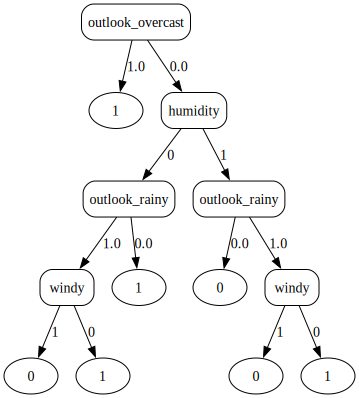

In [50]:
print("--- Algoritmo ID3 ---")
model_id3 = DecisionTreeID3(data=train_data, features=features, target_class=target)
model_id3.build()

test_samples = X_test.to_dict(orient='records')
y_pred = [model_id3.predict(sample) for sample in test_samples]

print("\n--- Métricas de Avaliação para o Modelo ID3 no Titanic ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print_rules(model_id3)
print("\n")

id3_tree_graph = plot_tree(model_id3.tree, features)
id3_tree_graph

--- Algoritmo C4.5 ---

--- Métricas de Avaliação para o Modelo C45 no Titanic ---
Acurácia: 1.0000

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


Matriz de Confusão:
[[1 0]
 [0 2]]
--- Regras para o modelo DecisionTreeC45 ---
Regra 1: SE outlook_overcast == '<= 0.5' E temperature == '<= 1.5' E humidity == '<= 0.5' E outlook_rainy == '<= 0.5' ENTÃO 1
Regra 2: SE outlook_overcast == '<= 0.5' E temperature == '<= 1.5' E humidity == '<= 0.5' E outlook_rainy == '> 0.5' E windy == '<= 0.5' ENTÃO 1
Regra 3: SE outlook_overcast == '<= 0.5' E temperature == '<= 1.5' E humidity == '<= 0.5' E outlook_rainy == '> 0.5' E windy == '> 0.5' ENTÃO 0
Regra 4: SE outlook_overcast == '<= 0.5' E tempe

/var/folders/xw/7_chx6gd3dxd7s10j71hxp_w0000gn/T/ipykernel_89460/2807041419.py:29: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[col][:] = data[col].fillna(mean_val)
/var/folders/xw/7_chx6gd3dxd7s10j71hxp_w0000gn/T/ipykernel_89460/28070

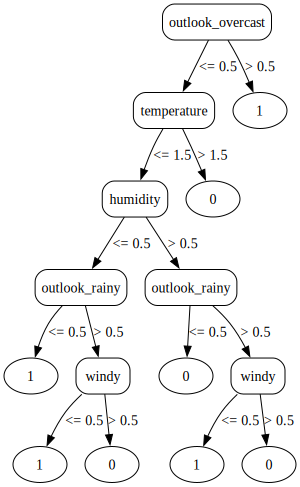

In [52]:
print("--- Algoritmo C4.5 ---")
model_c45 = DecisionTreeC45(data=train_data, features=features, target_class=target)
model_c45.build()

test_samples = X_test.to_dict(orient='records')
y_pred = [model_c45.predict(sample) for sample in test_samples]

print("\n--- Métricas de Avaliação para o Modelo C45 no Titanic ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print_rules(model_c45)
print("\n")

c45_tree_graph = plot_tree(model_c45.tree, features)
c45_tree_graph

--- Algoritmo CART ---

--- Métricas de Avaliação para o Modelo Cart no Titanic ---
Acurácia: 0.6667

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3


Matriz de Confusão:
[[0 1]
 [0 2]]
--- Regras para o modelo DecisionTreeCART ---
Regra 1: SE outlook_overcast <= 0.5 E humidity <= 0.5 E outlook_rainy <= 0.5 ENTÃO 1
Regra 2: SE outlook_overcast <= 0.5 E humidity <= 0.5 E outlook_rainy > 0.5 E windy <= 0.5 ENTÃO 1
Regra 3: SE outlook_overcast <= 0.5 E humidity <= 0.5 E outlook_rainy > 0.5 E windy > 0.5 ENTÃO 0
Regra 4: SE outlook_overcast <= 0.5 E humidity > 0.5 E outlook_rainy <= 0.5 ENTÃO 0
Regra 5: SE outlook_overcast <= 0.5 E humidity > 0.5 E outlook_rainy > 0.5 E windy <= 0.5 ENTÃO

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

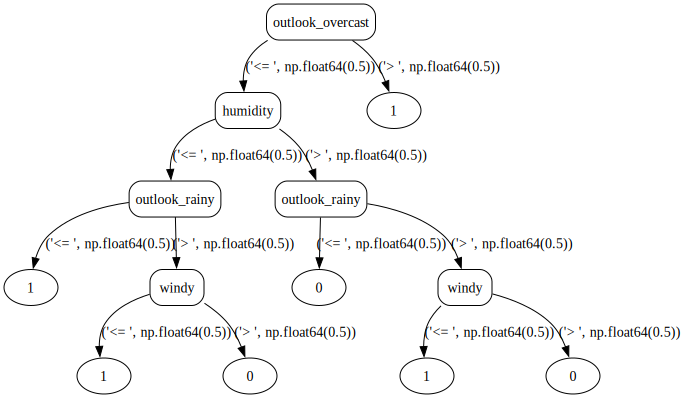

In [53]:
print("--- Algoritmo CART ---")
model_cart = DecisionTreeCART(data=train_data, features=features, target_class=target)
model_cart.build()


test_samples = X_test.to_dict(orient='records')
y_pred = [model_cart.predict(sample) for sample in test_samples]

print("\n--- Métricas de Avaliação para o Modelo Cart no Titanic ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print_rules(model_cart)
print("\n")

cart_tree_graph = plot_tree(model_cart.tree, features)
cart_tree_graph
